In [1]:
import pandas as pd
from xgboost import XGBClassifier

In [2]:
train_df=pd.read_csv(filepath_or_buffer=r'C:\Users\Abhishek\Downloads\mle_task 2\mle_task\train.csv',infer_datetime_format='TRUE')

In [3]:
train_df.head(5)

,Timestamp,FeaA,FeaB,FeaC,FeaD,FeaE,Label
0,02/09/2014 12:44:39 PM,1.639634,1.042247,3.188435,3.360856,133.06,4
1,02/09/2014 12:46:39 PM,1.639924,1.044448,3.187664,3.364210,135.02,4
2,02/09/2014 12:48:39 PM,1.639827,1.042247,3.188050,3.367553,135.36,4
3,02/09/2014 12:50:39 PM,1.640258,1.035558,3.187664,3.370495,136.22,4
4,02/09/2014 12:52:39 PM,1.639566,1.059480,3.188821,3.373136,136.48,4


In [4]:
train_df.dtypes

Timestamp     object
FeaA         float64
FeaB         float64
FeaC         float64
FeaD         float64
FeaE         float64
Label          int64
dtype: object

In [5]:
train_df['Timestamp'] = pd.to_datetime(train_df.Timestamp)
train_df.head()

,Timestamp,FeaA,FeaB,FeaC,FeaD,FeaE,Label
0,2014-02-09 12:44:39,1.639634,1.042247,3.188435,3.360856,133.06,4
1,2014-02-09 12:46:39,1.639924,1.044448,3.187664,3.364210,135.02,4
2,2014-02-09 12:48:39,1.639827,1.042247,3.188050,3.367553,135.36,4
3,2014-02-09 12:50:39,1.640258,1.035558,3.187664,3.370495,136.22,4
4,2014-02-09 12:52:39,1.639566,1.059480,3.188821,3.373136,136.48,4


In [6]:
train_df.dtypes

Timestamp    datetime64[ns]
FeaA                float64
FeaB                float64
FeaC                float64
FeaD                float64
FeaE                float64
Label                 int64
dtype: object

In [7]:
train_df['year']=train_df.Timestamp.dt.year
train_df['month']=train_df.Timestamp.dt.month
train_df['day']=train_df.Timestamp.dt.day
train_df['dayofweek']=train_df.Timestamp.dt.dayofweek
train_df['dayofyear']=train_df.Timestamp.dt.dayofyear
train_df['hour']=train_df.Timestamp.dt.hour
train_df['minute']=train_df.Timestamp.dt.minute
train_df['second']=train_df.Timestamp.dt.second
train_df['is_leap_year']=train_df.Timestamp.dt.is_leap_year
train_df['is_month_end']=train_df.Timestamp.dt.is_month_end
train_df['week']=train_df.Timestamp.dt.week
train_df['weekday']=train_df.Timestamp.dt.weekday
train_df['weekofyear']=train_df.Timestamp.dt.weekofyear

In [8]:
train_df

,Timestamp,FeaA,FeaB,FeaC,FeaD,FeaE,Label,year,month,day,dayofweek,dayofyear,hour,minute,second,is_leap_year,is_month_end,week,weekday,weekofyear
0,2014-02-09 12:44:39,1.639634,1.042247,3.188435,3.360856,133.0600,4,2014,2,9,6,40,12,44,39,False,False,6,6,6
1,2014-02-09 12:46:39,1.639924,1.044448,3.187664,3.364210,135.0200,4,2014,2,9,6,40,12,46,39,False,False,6,6,6
2,2014-02-09 12:48:39,1.639827,1.042247,3.188050,3.367553,135.3600,4,2014,2,9,6,40,12,48,39,False,False,6,6,6
3,2014-02-09 12:50:39,1.640258,1.035558,3.187664,3.370495,136.2200,4,2014,2,9,6,40,12,50,39,False,False,6,6,6
4,2014-02-09 12:52:39,1.639566,1.059480,3.188821,3.373136,136.4800,4,2014,2,9,6,40,12,52,39,False,False,6,6,6
5,2014-02-09 12:54:39,1.639634,1.037802,3.188628,3.374796,137.0800,4,2014,2,9,6,40,12,54,39,False,False,6,6,6
6,2014-02-09 12:56:39,1.639827,1.042247,3.188435,3.374308,136.9800,4,2014,2,9,6,40,12,56,39,False,False,6,6,6
7,2014-02-09 12:58:39,1.640139,1.046635,3.190362,3.374503,137.2800,4,2014,2,9,6,40,12,58,39,False,False,6,6,6
8,2014-02-09 13:02:39,1.640756,1.048809,3.188435,3.374308,137.6400,4,2014,2,9,6,40,13,2,39,False,False,6,6,6
9,2014-02-09 13:06:39,1.640496,1.040031,3.188821,3.374699,138.2200,4,2014,2,9,6,40,13,6,39,False,False,6,6,6


In [9]:
cleanup_nums = {"is_leap_year":{"False": 0, "True": 1},
                "is_month_end":{"False": 0, "True": 1}}

In [10]:
train_df["is_leap_year"] = train_df["is_leap_year"].astype('category')
train_df["is_month_end"] = train_df["is_month_end"].astype('category')
#train_df.replace(cleanup_nums, inplace=True)
train_df["is_leap_year_cat"] = train_df["is_leap_year"].cat.codes
train_df["is_month_end_cat"] = train_df["is_month_end"].cat.codes
train_df.head()

,Timestamp,FeaA,FeaB,FeaC,FeaD,FeaE,Label,year,month,day,...,hour,minute,second,is_leap_year,is_month_end,week,weekday,weekofyear,is_leap_year_cat,is_month_end_cat
0,2014-02-09 12:44:39,1.639634,1.042247,3.188435,3.360856,133.06,4,2014,2,9,...,12,44,39,False,False,6,6,6,0,0
1,2014-02-09 12:46:39,1.639924,1.044448,3.187664,3.364210,135.02,4,2014,2,9,...,12,46,39,False,False,6,6,6,0,0
2,2014-02-09 12:48:39,1.639827,1.042247,3.188050,3.367553,135.36,4,2014,2,9,...,12,48,39,False,False,6,6,6,0,0
3,2014-02-09 12:50:39,1.640258,1.035558,3.187664,3.370495,136.22,4,2014,2,9,...,12,50,39,False,False,6,6,6,0,0
4,2014-02-09 12:52:39,1.639566,1.059480,3.188821,3.373136,136.48,4,2014,2,9,...,12,52,39,False,False,6,6,6,0,0


In [11]:
train_df.columns

Index(['Timestamp', 'FeaA', 'FeaB', 'FeaC', 'FeaD', 'FeaE', 'Label', 'year',
       'month', 'day', 'dayofweek', 'dayofyear', 'hour', 'minute', 'second',
       'is_leap_year', 'is_month_end', 'week', 'weekday', 'weekofyear',
       'is_leap_year_cat', 'is_month_end_cat'],
      dtype='object')

In [12]:
tr=train_df[[ 'year','month', 'day', 'dayofweek', 'dayofyear', 'hour', 'minute', 'second', 'week', 
 'weekday', 'weekofyear','is_leap_year_cat', 'is_month_end_cat','FeaA', 'FeaB', 'FeaC', 'FeaD', 'FeaE', 'Label' ]]

In [13]:
tr.head()

,year,month,day,dayofweek,dayofyear,hour,minute,second,week,weekday,weekofyear,is_leap_year_cat,is_month_end_cat,FeaA,FeaB,FeaC,FeaD,FeaE,Label
0,2014,2,9,6,40,12,44,39,6,6,6,0,0,1.639634,1.042247,3.188435,3.360856,133.06,4
1,2014,2,9,6,40,12,46,39,6,6,6,0,0,1.639924,1.044448,3.187664,3.364210,135.02,4
2,2014,2,9,6,40,12,48,39,6,6,6,0,0,1.639827,1.042247,3.188050,3.367553,135.36,4
3,2014,2,9,6,40,12,50,39,6,6,6,0,0,1.640258,1.035558,3.187664,3.370495,136.22,4
4,2014,2,9,6,40,12,52,39,6,6,6,0,0,1.639566,1.059480,3.188821,3.373136,136.48,4


In [14]:
x=tr.drop(columns=['Label'])
y=tr['Label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [17]:
model=XGBClassifier()

In [18]:
%%time 
model.fit(X_train,y_train)

Wall time: 7min 57s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
model.score(X_val,y_val)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9921875

In [21]:
model.score(X_test,y_test)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.991875

In [22]:
model.feature_importances_

array([0.00744346, 0.        , 0.00372173, 0.00400802, 0.05725737,
       0.01402806, 0.00085886, 0.03406814, 0.01774978, 0.        ,
       0.        , 0.00515316, 0.        , 0.15173204, 0.07586602,
       0.17062697, 0.17377612, 0.28371027], dtype=float32)

In [23]:
fi=pd.DataFrame(data=X_train.columns,columns=['cols'])

In [24]:
fi['imp']=model.feature_importances_

In [25]:
fi.sort_values(by='imp',ascending=False)

,cols,imp
17,FeaE,0.283710
16,FeaD,0.173776
15,FeaC,0.170627
13,FeaA,0.151732
14,FeaB,0.075866
4,dayofyear,0.057257
7,second,0.034068
8,week,0.017750
5,hour,0.014028
0,year,0.007443


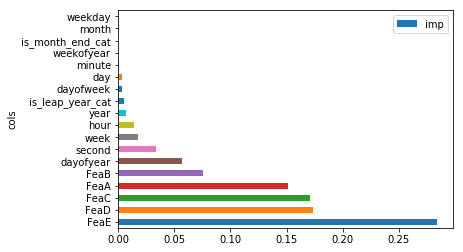

In [27]:
fi.sort_values(by='imp',ascending=False).plot(x='cols',y='imp',kind='barh',sort_columns='imp')